# BIS(BIOPROCESS ASSISTANT SOFTWARE)

## BIBLIOTECAS:

In [83]:
import pandas as pd
import numpy as np
from lmfit import Model
import matplotlib.pyplot as plt
import pprint
import funcoes as fn

## IMPORTANTO E TRABALHANDO COM OS DADOS:

### Importando arquivos de exemplo:

In [43]:
# Defina o caminho para o arquivo .xlsx
caminho_arquivo = '/home/ABTLUS/daniel23020/Documentos/ILUM/4° Semestre/IP/BAS/dados_exemplo/GP_example_Ilum.xlsx'

dataset_exemplo = pd.read_excel(caminho_arquivo, header=None)

In [44]:
dataset_exemplo.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0.0,0.318,0.212,0.244,0.198,0.203,0.224,0.192,0.166,0.137,...,0.228,0.189,0.217,0.178,0.138,0.116,0.082,0.051,0.051,0.079
1,30.0,0.376,0.249,0.297,0.243,0.243,0.271,0.240,0.201,0.172,...,0.273,0.228,0.257,0.205,0.150,0.124,0.083,0.047,0.047,0.073
2,60.0,0.407,0.269,0.327,0.263,0.265,0.287,0.257,0.219,0.184,...,0.295,0.247,0.275,0.228,0.160,0.131,0.089,0.046,0.048,0.071
3,90.0,0.443,0.292,0.355,0.281,0.284,0.309,0.274,0.227,0.194,...,0.320,0.270,0.302,0.247,0.167,0.137,0.094,0.047,0.047,0.075
4,120.0,0.484,0.315,0.384,0.312,0.314,0.333,0.295,0.247,0.213,...,0.340,0.298,0.322,0.264,0.171,0.138,0.096,0.047,0.048,0.075


### Função: Tira média das triplicatas na horizontal e adiciona um nome a cada coluna.

In [45]:
def df_triplicatas(dataset):

    dataset_sem_triplicatas = pd.DataFrame(dataset.iloc[:,0]) # Reservando a primeira coluna do dataset, correspondente ao tempo. 

    dataset_sem_triplicatas.columns = ['Tempo(horas)'] + list(dataset_sem_triplicatas.columns[1:])  # Substitua 'Novo_Nome' pelo nome desejado

    # Divide os valores da primeira coluna por 60
    dataset_sem_triplicatas["Tempo(horas)"] = dataset_sem_triplicatas["Tempo(horas)"] / 60 #transformando o tempo de minutos para hora


    colunas = int((len(dataset.columns) - 1) / 3)

    letras_colunas = ["A","B","C","D","E","F","G","H",]

    letra = 0

    passo = 1

    for i in range(1, colunas + 1):
        
        colunas_para_media = dataset.iloc[:, (i*3 -2) : (i*3+1)]  # Substitua 0:3 pelos índices das colunas desejadas

        # Calcula a média das três colunas para cada linha
        media_colunas = colunas_para_media.mean(axis=1)


        # Cria um novo DataFrame e adiciona a coluna com as médias
        dataset_sem_triplicatas[f'Poço-{letras_colunas[letra]}({(passo*3-2)}-{(passo*3)})'] = media_colunas

        if (i % 4) == 0:
            letra += 1
        
        if passo == 4:
            passo = 1
        else:
            passo += 1

    return dataset_sem_triplicatas
    

## Criando Dicionário de Datasets com base nas colunas:

### Criando uma dicionário de datasets

In [46]:
teste = df_triplicatas(dataset_exemplo)

In [47]:
def construir_dici_poços(dataset):

    primeira_coluna = dataset.columns[0]

    # Criando o dicionário com as colunas (exceto a primeira) e os respectivos datasets
    return {col: dataset[[primeira_coluna, col]] for col in dataset.columns[1:]}
    

In [48]:
dicionario_poços = construir_dici_poços(teste)

In [49]:
dados = input("Qual os poços que estavam suas amostras. (Ex: Poço-B(1-3))")

In [50]:
dicionario_poços[dados]

,Tempo(horas),Poço-B(1-3)
0,0.000000,0.207333
1,0.500000,0.260667
2,1.000000,0.281000
3,1.500000,0.304333
4,2.000000,0.331667
...,...,...
235,117.504167,8.433667
236,118.004167,8.435333
237,118.504167,8.448000
238,119.004167,8.485333


In [51]:
dicionario_poços[dados][dicionario_poços[dados].columns[1]]  # Pegando somente o valor da segunda coluna....

0      0.207333
1      0.260667
2      0.281000
3      0.304333
4      0.331667
         ...   
235    8.433667
236    8.435333
237    8.448000
238    8.485333
239    8.427000
Name: Poço-B(1-3), Length: 240, dtype: float64

### Criando um dicionário de dicionario de datasets

In [52]:
def construir_dici_placas(arquivos):
    dici_placas = {}
    for i, dic in enumerate(arquivos, start=1):
        # Cria a chave "Placa_{i}" e atribui o dicionário de poços
        dici_placas[f"Placa_{i}"] = dic
    
    return dici_placas

In [53]:
def arquivos_to_placas(dados_brutos):
    """
    Constrói um dicionário de placas a partir de uma lista de dicionários de poços.

    :param arquivos: Lista de dicionários de poços
    :return: Dicionário de placas organizado
    """
    
    lista_df_destriplicados = []

    for dados in dados_brutos: 
        df_reduzido = df_triplicatas(dados)
        lista_df_destriplicados.append(df_reduzido)

    lista_dici_poços = []

    for df in lista_df_destriplicados:
        dici_poços = construir_dici_poços(df)
        lista_dici_poços.append(dici_poços)
    

    dici_placas = construir_dici_placas(lista_dici_poços)

    return dici_placas


In [54]:
dados_brutos = [dataset_exemplo]

In [55]:
dici_final = fn.arquivos_to_placas(dados_brutos)

In [58]:
dici_final

{'Placa_1': {'Poço-A(1-3)':      Tempo(horas)  Poço-A(1-3)
  0        0.000000     0.258000
  1        0.500000     0.307333
  2        1.000000     0.334333
  3        1.500000     0.363333
  4        2.000000     0.394333
  ..            ...          ...
  235    117.504167     8.317333
  236    118.004167     8.328000
  237    118.504167     8.330333
  238    119.004167     8.363333
  239    119.504167     8.328000
  
  [240 rows x 2 columns],
  'Poço-A(4-6)':      Tempo(horas)  Poço-A(4-6)
  0        0.000000     0.208333
  1        0.500000     0.252333
  2        1.000000     0.271667
  3        1.500000     0.291333
  4        2.000000     0.319667
  ..            ...          ...
  235    117.504167     7.636333
  236    118.004167     7.644333
  237    118.504167     7.689333
  238    119.004167     7.711000
  239    119.504167     7.682667
  
  [240 rows x 2 columns],
  'Poço-A(7-9)':      Tempo(horas)  Poço-A(7-9)
  0        0.000000     0.165000
  1        0.500000     0.20

In [61]:
for i in dici_final:
    for o in dici_final[i]:
        print(o)

Poço-A(1-3)
Poço-A(4-6)
Poço-A(7-9)
Poço-A(10-12)
Poço-B(1-3)
Poço-B(4-6)
Poço-B(7-9)
Poço-B(10-12)
Poço-C(1-3)
Poço-C(4-6)
Poço-C(7-9)
Poço-C(10-12)
Poço-D(1-3)
Poço-D(4-6)
Poço-D(7-9)
Poço-D(10-12)
Poço-E(1-3)
Poço-E(4-6)
Poço-E(7-9)
Poço-E(10-12)
Poço-F(1-3)
Poço-F(4-6)
Poço-F(7-9)
Poço-F(10-12)
Poço-G(1-3)
Poço-G(4-6)
Poço-G(7-9)
Poço-G(10-12)
Poço-H(1-3)
Poço-H(4-6)
Poço-H(7-9)
Poço-H(10-12)


In [56]:
y_0 = dici_final['Placa_1']['Poço-B(10-12)']['Poço-B(10-12)']

In [57]:
y_0

0      0.168667
1      0.210667
2      0.232000
3      0.254000
4      0.281667
         ...   
235    7.634000
236    7.645667
237    7.647000
238    7.660000
239    7.676333
Name: Poço-B(10-12), Length: 240, dtype: float64

## Modelagem Matemática

### Definindo Variáveis:

In [ ]:
placa = input("Qual a placa os poços de seu interesse (Ex: Placa_1)")
poços = input("Qual os poços que estavam suas amostras. (Ex: Poço-B(1-3))")


In [ ]:
x = dici_final[placa][poços][dici_final[placa][poços].columns[0]]
y = dici_final[placa][poços][dici_final[placa][poços].columns[1]]


#Método Antigo
#y = dicionario_poços[dados][dicionario_poços[dados].columns[1]] 
#x = dicionario_poços[dados][dicionario_poços[dados].columns[0]] 

### Definindo Modelo de Gompertz:

In [65]:
def gompertz(t, Nmax, k, tlag):
    '''
    Calcula a função de Gompertz para modelar o crescimento microbiano.

    Args:
    t (float): Tempo em unidades de horas.
    Nmax (float): Valor assintótico máximo da população de micro-organismos. Representa a capacidade máxima de crescimento da cultura.
    k (float): Taxa de crescimento específica. Determina a rapidez com que a população de micro-organismos cresce após o período de lag.
    tlag (float): Tempo de lag ou atraso antes do início do crescimento exponencial. Representa o tempo necessário para a adaptação inicial da população.

    Returns:
    float: Resultado da função de Gompertz, o valor estimado da população de micro-organismos para cada instante de tempo.
    '''
    return Nmax * np.exp(-np.exp(-k * (t - tlag)))

In [81]:
outro = fn.gompertz(1 ,34,5 , 6)

AttributeError: module 'funcoes' has no attribute 'gompertz'

In [68]:
modelo_gompertz = Model(fn.gompertz)

params = modelo_gompertz.make_params(Nmax=10, k=0.5, tlag=1)
params['Nmax'].min = 0  # Limite mínimo para Nmax
params['k'].min = 0.01  # Limite mínimo para k
params['tlag'].min = 0  # Limite mínimo para tlag


#desvio_padrao_nmax = resultado_fit.params["Nmax"].stderr

residuos = y - resultado_fit.best_fit

# Calcula o desvio padrão dos resíduos
desvio_padrao = np.std(residuos)


resultado_fit = modelo_gompertz.fit(y, params, t=x)
print(resultado_fit.fit_report())

AttributeError: module 'funcoes' has no attribute 'gompertz'

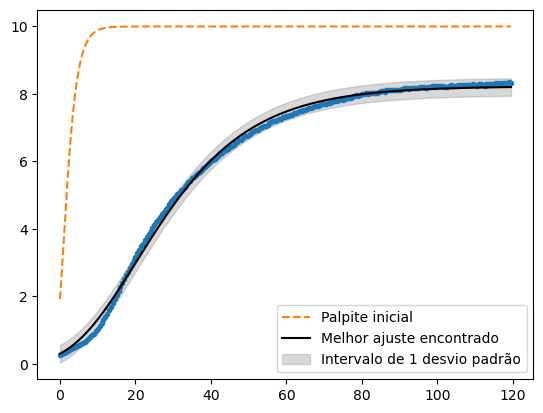

In [ ]:
plt.plot(x, y, '.')
plt.plot(x, resultado_fit.init_fit, '--', label='Palpite inicial')
plt.plot(x, resultado_fit.best_fit, '-', color='black', label='Melhor ajuste encontrado')


plt.fill_between(x, resultado_fit.best_fit - desvio_padrao, resultado_fit.best_fit + desvio_padrao,
                    color='gray', alpha=0.3, label='Intervalo de 1 desvio padrão')
plt.legend()
plt.show()

### Denifindo Modelo Linear:

In [ ]:
  # Definir a função linear
def linear(t, slope, intercept):
    """Define uma função linear que será usada para o ajuste de dados."""
    return slope * t + intercept

# Criar o modelo linear
linear_model = Model(linear)

# Definir parâmetros iniciais
params = linear_model.make_params(slope=1, intercept=0)

NameError: name 'Model' is not defined

In [ ]:
log_column = np.log(y)

In [ ]:
# Fazer o ajuste
result = linear_model.fit(log_column, params, t=x)

# Calcular os resíduos
residuos = y - result.best_fit

# Calcular o desvio padrão dos resíduos
desvio_padrao = np.std(residuos)

In [ ]:

print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 240
    # variables        = 2
    chi-square         = 63.2133172
    reduced chi-square = 0.26560217
    Akaike info crit   = -316.189743
    Bayesian info crit = -309.228465
    R-squared          = 0.59379813
[[Variables]]
    slope:      0.01791194 +/- 9.6030e-04 (5.36%) (init = 1)
    intercept:  0.54653849 +/- 0.06632662 (12.14%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.8651


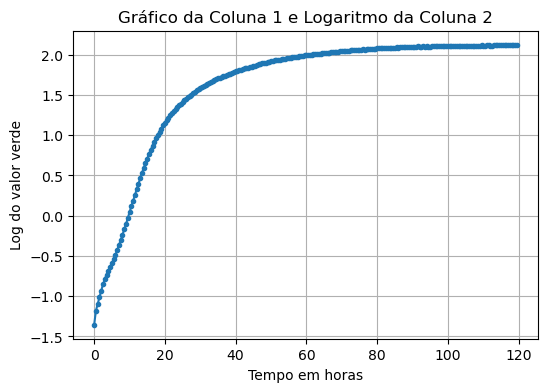

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(x, log_column, marker='.', linestyle='-')
plt.xlabel('Tempo em horas')  # Renomeie conforme necessário
plt.ylabel('Log do valor verde')  # Renomeie conforme necessário
plt.title('Gráfico da Coluna 1 e Logaritmo da Coluna 2')
plt.grid(True)
plt.show()

### Modelo de Zwietering

In [ ]:
def zwietering(t, y_0, Nmax, k, tlag):
    """
    Calcula a função modificada de Gompertz para modelar o crescimento microbiano.

    A função de Gompertz é frequentemente usada para descrever o crescimento de populações biológicas, como o crescimento microbiano, com base em parâmetros que controlam a taxa de crescimento, o tempo de atraso (lag) e o valor máximo de crescimento.

    Args:
        t (float): Tempo em unidades de horas.
        y_0 (float): Valor inicial da variável de resposta no tempo zero (t=0).
        A (float): Amplitude do crescimento ou valor assintótico máximo atingido pela função.
        k (float): Taxa de crescimento específica, controlando a rapidez com que o crescimento ocorre após o período de lag.
        tlag (float): Tempo de lag ou atraso, representando o tempo necessário para a adaptação inicial antes do crescimento exponencial.

    Returns:
        float: O valor estimado da função de Gompertz no tempo `t`, representando o crescimento da população microbiana ao longo do tempo.
    """
    return y_0 + ((Nmax - y_0)/(1 + np.exp(((4 * k)/Nmax) * (tlag - t) + 2)))

In [ ]:
y_0 = dici_final['Placa_1']['Poço-B(10-12)']['Poço-B(10-12)'][0]



modelo_zwietering = Model(zwietering)

params = modelo_zwietering.make_params(Nmax=0.1, k=0.1, tlag=0, y_0 = 0)
params['Nmax'].min = 0  # Limite mínimo para Nmax  
params['k'].min = 0.01  # Limite mínimo para k
params['tlag'].min = 0  # Limite mínimo para tlag
params['y_0'].min = 0  # Limite mínimo para tlag
params['y_0'].vary = False  # Fizando y_0



resultado_fit = modelo_zwietering.fit(y, params, t=x)
print(resultado_fit.fit_report())

#desvio_padrao_nmax = resultado_fit.params["Nmax"].stderr

residuos = y - resultado_fit.best_fit

# Calcula o desvio padrão dos resíduos
desvio_padrao = np.std(residuos)

[[Model]]
    Model(zwietering)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 123
    # data points      = 240
    # variables        = 3
    chi-square         = 15.7527702
    reduced chi-square = 0.06646738
    Akaike info crit   = -647.669445
    Bayesian info crit = -637.227528
    R-squared          = 0.98793666
[[Variables]]
    y_0:   0 (fixed)
    Nmax:  7.37566083 +/- 0.02626751 (0.36%) (init = 0.1)
    k:     0.15701236 +/- 0.00278276 (1.77%) (init = 0.1)
    tlag:  4.14236411 +/- 0.46741272 (11.28%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(k, tlag)    = +0.8899
    C(Nmax, k)    = -0.3188
    C(Nmax, tlag) = -0.2051


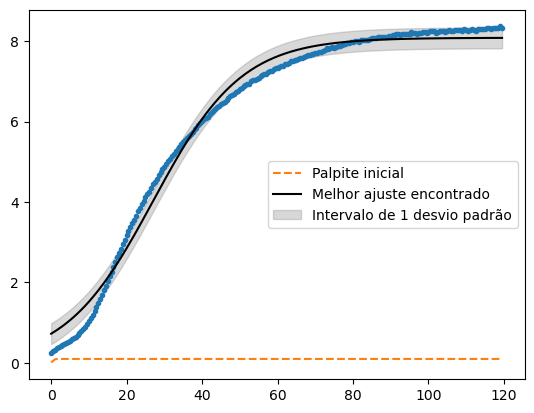

In [ ]:
plt.plot(x, y, '.')
plt.plot(x, resultado_fit.init_fit, '--', label='Palpite inicial')
plt.plot(x, resultado_fit.best_fit, '-', color='black', label='Melhor ajuste encontrado')


plt.fill_between(x, resultado_fit.best_fit - desvio_padrao, resultado_fit.best_fit + desvio_padrao,
                    color='gray', alpha=0.3, label='Intervalo de 1 desvio padrão')
plt.legend()
plt.show()

## Criando tabela de parametros iniciais:

### Algumas variáveis:

In [35]:
A = resultado_fit.params["A"].value
k = resultado_fit.params["k"].value
y_0



### Definindo função do Growth Score:

In [ ]:
def growth_score(k, Nmax, y_0):
    """
    Calcula a pontuação de crescimento com base na taxa de crescimento específica (k) e nos valores assintóticos da população.

    Args:
    k (float): Taxa de crescimento específica. Representa a rapidez com que a população de micro-organismos cresce.
    Nmax (float): Valor assintótico máximo da população de micro-organismos. Representa a capacidade máxima de crescimento.
    y_0 (float): Valor inicial da população de micro-organismos.

    Returns:
    float: Pontuação de crescimento, calculada como a diferença entre o valor máximo e o valor inicial da população acrescida de 25% da taxa de crescimento.
    """
    return (Nmax - y_0) + 0.25*k

In [36]:
GS = growth_score(k, A, y_0)
GS

7.2462472474833275

### Função que Cria Tabela:

In [41]:
def gerar_tabela(dici_final, ini_log, fim_log, modelo_escolhido = "Gompertz"):


    if modelo_escolhido == "Gompertz":
        
        tabela = {
                    "Placa": [],
                    "Poços": [],
                    "Taxa Crescimento": [],
                    "Nmax": [],
                    "Tempo lag": [],
                    "Growth Score": [],

                }
        

        for placa in dici_final:
            for poço in dici_final[placa]:
                
                x = dici_final[placa][poços][dici_final[placa][poços].columns[0]]
                y = dici_final[placa][poços][dici_final[placa][poços].columns[1]]

                

                tabela["Poços"].append(poço)
            tabela["Placa"].append(placa)
            



    if modelo_escolhido == "Zwietering":

        tabela = {
                    "Placa": [],
                    "Poços": [],
                    "Taxa Crescimento": [],
                    "Nmax": [],
                    "Tempo lag": [],
                    "Growth Score": [],
                }
        
    if modelo_escolhido == "Linear":
         
         tabela = {
                    "Placa": [],
                    "Poços": [],
                    "Taxa Crescimento": [],
                    "Nmax": [],
                    "Tempo lag": [],
                    "Growth Score": [],
                }

    

SyntaxError: parameter without a default follows parameter with a default (3112650377.py, line 1)

### outra bobice

In [ ]:


tabela_parametros = {
                'Poços': {"STD_da_Curva": [],
                        'Nmax': [],
                        'K': [],
                        'T-lag': []
                    }                
            }

## Plotando mais de um gráfico por vez

In [57]:
def modelo_escolhido(modelo,tabela, i):

    # Função que define o modelo de tabela caso a tabela estaja vazia:
    def gerar_tabela(modelo):
        if modelo == "Linear":
            tabela = {
                'Poços': [],
                "STD_da_Curva": [],
                "Slope": [],
                'Intercept': []
            }
            return tabela

        if modelo == "Gompertz":
            tabela = {
                'Poços': [],
                "STD_da_Curva": [],
                'Nmax': [],
                'K': [],
                'T-lag': []
            }
            return tabela

        if modelo == "Exponencial":
            tabela = {
                'Poços': [],
                "STD": [],
                "Slope": [],
                'Intercept': []
            }
            return tabela



    if not bool(tabela): # Se a tabela estiver vazía.
        tabela = gerar_tabela(modelo) # Gera uma tabela utilizando o modelo escolhido

    # Adiciona os parametros otimizados para cada amostra no dicionario definido anteriormente. 
    tabela['Poços'].append(i)
    tabela['STD_da_Curva'].append(desvio_padrao)
    tabela['Nmax'].append(resultado_fit.params["Nmax"].value)
    tabela['K'].append(resultado_fit.params["k"].value)
    tabela["T-lag"].append(resultado_fit.params["tlag"].value)
    
    return tabela



    tabela['Poços'].append(i)
    tabela['STD_da_Curva'].append(desvio_padrao)
    tabela['Slope'].append(resultado_fit.params["Nmax"].value)
    tabela['Intercep'].append(resultado_fit.params["I"].value)



    return tabela 
    
    
    

IndentationError: expected an indented block after function definition on line 4 (727814728.py, line 9)

In [56]:
modelo = input('Qual o modelo escolhido? Ex: "Linear", "Exponencial", "Gompertz"')

In [55]:
tabela = {}

for i in amostras:
    result_fit, tabela = modelo_escolhido(modelo,tabela,i)
    


SyntaxError: incomplete input (4110753481.py, line 1)

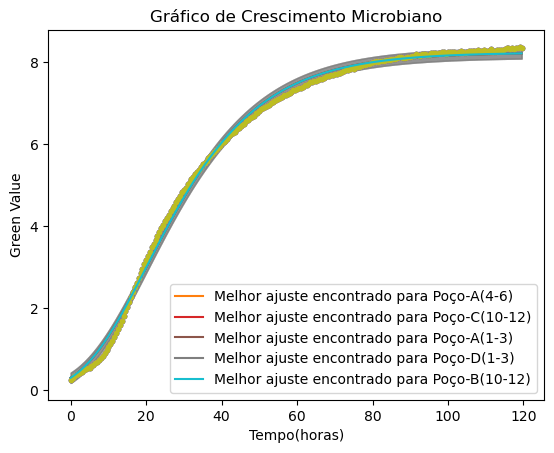

           Poços  STD_da_Curva      Nmax         K      T-lag
0    Poço-A(4-6)      0.125546  8.228539  0.059105  20.217373
1  Poço-C(10-12)      0.125546  8.228539  0.059105  20.217373
2    Poço-A(1-3)      0.125546  8.228539  0.059105  20.217373
3    Poço-D(1-3)      0.125546  8.228539  0.059105  20.217373
4  Poço-B(10-12)      0.125546  8.228539  0.059105  20.217373


In [161]:
amostras = ["Poço-A(4-6)","Poço-C(10-12)","Poço-A(1-3)","Poço-D(1-3)","Poço-B(10-12)"]  # Definindo os poços que serão usados e comparados. 

modelo_gompertz = Model(gompertz_2) # Definindo qual modelo será usado. 

params = modelo_gompertz.make_params(Nmax=10, k=0.5, tlag=1) #Definindo Parametros iniciais do modelo
params['Nmax'].min = 0  # Limite mínimo para Nmax
params['k'].min = 0.01  # Limite mínimo para k
params['tlag'].min = 0  # Limite mínimo para tlag


#linear_model = Model(linear)

# Definir parâmetros iniciais
#params = linear_model.make_params(slope=1, intercept=0)



# Definindo o dicinionário que vai receber parametros otimizados e que posteriormente irão para uma tabela.
tabela = {
    'Poços': [],
    "STD_da_Curva": [],
    'Nmax': [],
    'K': [],
    'T-lag': []
}




for i in amostras: #Itera cada uma das amostras selecionadas
    
    x = dici_final[placa][poços][dici_final[placa][poços].columns[0]]
    y = dici_final[placa][poços][dici_final[placa][poços].columns[1]]

    resultado_fit = modelo_gompertz.fit(y, params, t=x)

    residuos = y - resultado_fit.best_fit

    # Calcula o desvio padrão dos resíduos
    desvio_padrao = np.std(residuos)


    #print(resultado_fit.fit_report())

    # Adiciona os parametros otimizados para cada amostra no dicionario definido anteriormente. 
    tabela['Poços'].append(i)
    tabela['STD_da_Curva'].append(desvio_padrao)
    tabela['Nmax'].append(resultado_fit.params["Nmax"].value)
    tabela['K'].append(resultado_fit.params["k"].value)
    tabela["T-lag"].append(resultado_fit.params["tlag"].value)




    # Criar o gráfico de pontos
    plt.plot(x, y, '.')

    # Plotar a linha do melhor ajuste
    plt.plot(x, resultado_fit.best_fit, '-', label=f"Melhor ajuste encontrado para {i}")


    plt.fill_between(x, resultado_fit.best_fit - desvio_padrao, resultado_fit.best_fit + desvio_padrao,
                    color='gray', alpha=0.3)

    # Adicionar legenda
    plt.legend()

    

#plt.figure(figsize=(10, 6))  # Aumenta o tamanho do gráfico (10 de largura e 6 de altura)

# Adicionar títulos e legendas aos eixos
plt.title("Gráfico de Crescimento Microbiano")
plt.xlabel("Tempo(horas)")  # Substitua pelo nome desejado
plt.ylabel("Green Value")  # Substitua pelo nome desejado  


plt.show()

parametros = pd.DataFrame(tabela)
print(parametros)


In [37]:
resultado_fit.params['Nmax'].stderr


0.01540595917981946

In [38]:
def teste():

    return 10, 15

In [39]:
x = teste()[1]

# Referencias:

[1] https://en.wikipedia.org/wiki/Gompertz_function  
[2] Notebooks sobre modelagem de dados disponibilizados pelos professores Daniel Roberto Cassar e James Moraes de Almeida 